In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import random
from datetime import date
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [5]:
data_multipliers = pd.read_csv('data_new_new.csv')
data_multipliers.head()

,id,title,dollar_age,type,latest offer,date_of_revenue,total,buyNowPrice,buyNowPriceMultiple,termExpiration
0,4762,"Publishing Royalties: ""Texas Flood""",39.05,30_year,60500.0,"['2017-04-01', '2017-07-01', '2017-10-01', '20...","[2045, 0, 1993, 0, 2722, 0, 4639, 0, 2284, 0, ...",75000.0,5.46,2052-08-11
1,4720,"Classic R&B/Soul Hits & ""Bittersweet"" - Songwr...",22.58,life_of_rights,18500.0,"['2010-10-01', '2011-01-01', '2011-04-01', '20...","[93, 209, 114, 181, 216, 106, 193, 605, 145, 1...",24500.0,9.25,-
2,4740,"Diverse International Catalog: R&B, K-Pop, + More",3.64,life_of_rights,21950.0,"['2016-10-01', '2016-11-01', '2016-12-01', '20...","[59, 0, 0, 0, 0, 0, 1531, 270, 0, 1498, 407, 3...",-1.0,-1.00,-
3,4749,"Future, Juice WRLD & Ugly God Royalties",4.04,life_of_rights,9400.0,"['2018-04-01', '2018-07-01', '2018-10-01', '20...","[806, 658, 2047, 921, 694, 629, 582, 628, 463,...",-1.0,-1.00,-
4,4724,Dan Bremnes - Contemporary Christian Royalties,3.94,life_of_rights,5500.0,"['2018-01-01', '2018-04-01', '2018-07-01', '20...","[520, 1313, 1218, 2478, 9026, 6043, 2026, 4945...",-1.0,-1.00,-


In [6]:
a = data_multipliers['type'].unique()
print(sorted(a))

['10_year', '30_year', 'life_of_rights', 'partial_10_year', 'partial_30_year']


In [7]:
print(len(data))
print(len(data[data['type']=='partial_10_year']))
print(len(data[data['type']=='10_year']))
print(len(data[data['type']=='partial_30_year']))
print(len(data[data['type']=='30_year']))
print(len(data[data['type']=='life_of_rights']))

484
195
2
31
53
202


In [8]:
data_10y=data_multipliers[data_multipliers['termExpiration']!='-'] 
data_10y=data_multipliers[(data_multipliers['type']=='partial_10_year') | (data_multipliers['type']=='10_year')]

In [9]:
data_10y.head()

,id,title,dollar_age,type,latest offer,date_of_revenue,total,buyNowPrice,buyNowPriceMultiple,termExpiration
7,4732,"NLE Choppa, BlocBoy, + More - Songwriter Royal...",3.58,10_year,9500.0,"['2012-01-01', '2012-04-01', '2012-07-01', '20...","[98, 15, 9, 9, 5, 0, 0, 0, 213, 0, 0, 0, 137, ...",13000.00,5.91,2032-08-11
8,4733,"NLE Choppa, Layton Greene, Blocboy + More",3.39,10_year,7777.0,"['2012-01-01', '2012-04-01', '2012-07-01', '20...","[98, 15, 9, 9, 5, 0, 0, 0, 213, 0, 0, 0, 101, ...",13000.00,6.63,2032-08-11
20,4750,Hip-Hop Songwriter Royalties Feat. DaBaby,2.26,partial_10_year,-1.0,"['2019-10-01', '2020-01-01', '2020-04-01', '20...","[8, 2, 46292, 14700, 20161, 12335, 11465, 1047...",-1.00,-1.00,2032-07-25
22,3704,Streaming-Driven Hip-Hop From RiFF RAFF,5.62,partial_10_year,2957.0,"['2016-04-01', '2016-07-01', '2016-10-01', '20...","[848, 868, 471, 639, 483, 399, 350, 468, 354, ...",2998.93,6.61,2029-07-27
40,4458,Migos “First 48” Publishing Royalties,6.58,partial_10_year,4500.0,"['2015-10-01', '2016-01-01', '2016-04-01', '20...","[1075, 487, 397, 659, 331, 4888, 463, 507, 123...",-1.00,-1.00,2029-10-14


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
quotes=data_10y[(data_10y['buyNowPriceMultiple']>0) &(data_10y['latest offer']>0)] # & (data_10y['dollar_age']<5)]
quotes['today']= pd.to_datetime('today')
quotes['Time past']=10-(pd.to_datetime(quotes['termExpiration'])-quotes['today'])/ np.timedelta64(1, 'Y')
#quotes['Time past'].head()
spread=quotes['buyNowPriceMultiple']-quotes['buyNowPriceMultiple']/quotes['buyNowPrice']*quotes['latest offer']

In [12]:
quotes=quotes[(spread<10)]#& (quotes['buyNowPrice']>10000)]

In [13]:
quotes.head()

,id,title,dollar_age,type,latest offer,date_of_revenue,total,buyNowPrice,buyNowPriceMultiple,termExpiration,today,Time past
7,4732,"NLE Choppa, BlocBoy, + More - Songwriter Royal...",3.58,10_year,9500.0,"['2012-01-01', '2012-04-01', '2012-07-01', '20...","[98, 15, 9, 9, 5, 0, 0, 0, 213, 0, 0, 0, 137, ...",13000.00,5.91,2032-08-11,2022-08-27 17:40:32.775997,0.044249
8,4733,"NLE Choppa, Layton Greene, Blocboy + More",3.39,10_year,7777.0,"['2012-01-01', '2012-04-01', '2012-07-01', '20...","[98, 15, 9, 9, 5, 0, 0, 0, 213, 0, 0, 0, 101, ...",13000.00,6.63,2032-08-11,2022-08-27 17:40:32.775997,0.044249
22,3704,Streaming-Driven Hip-Hop From RiFF RAFF,5.62,partial_10_year,2957.0,"['2016-04-01', '2016-07-01', '2016-10-01', '20...","[848, 868, 471, 639, 483, 399, 350, 468, 354, ...",2998.93,6.61,2029-07-27,2022-08-27 17:40:32.775997,3.086063
50,4702,"Travis Scott's Hit Single ""FRANCHISE"" - Songwr...",1.76,partial_10_year,1000.0,"['2021-01-01', '2021-04-01', '2021-07-01', '20...","[74, 1988, 269, 412, 280, 234]",9782.61,8.17,2032-06-03,2022-08-27 17:40:32.775997,0.233164
56,3478,Christina Perri Performance Royalties,10.18,partial_10_year,3000.0,"['2009-07-01', '2009-10-01', '2010-01-01', '20...","[156, 0, 184, 0, 0, 274, 51, 0, 151, 0, 171, 0...",4755.43,7.90,2030-03-12,2022-08-27 17:40:32.775997,2.461821


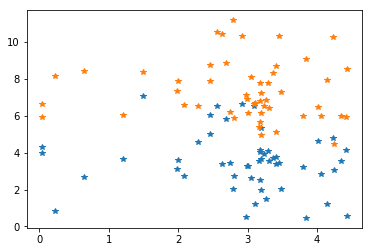

In [14]:
plt.plot(quotes['Time past'],quotes['buyNowPriceMultiple']/quotes['buyNowPrice']*quotes['latest offer'], '*')
plt.plot(quotes['Time past'],quotes['buyNowPriceMultiple'], '*')

In [15]:
asks7y=quotes[(quotes['Time past']>2.5) & (quotes['Time past']<3.5)]

(5, 9)

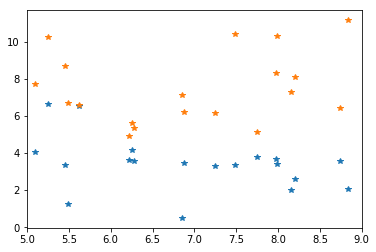

In [16]:
plt.plot(asks7y['dollar_age'],asks7y['buyNowPriceMultiple']/asks7y['buyNowPrice']*asks7y['latest offer'], '*')
plt.plot(asks7y['dollar_age'],asks7y['buyNowPriceMultiple'], '*')
plt.xlim([5,9])

In [17]:
new_data = pd.read_csv('data - new.csv')
new_data.head()

,id,title,dollar_age,type,highest open offer,date_of_revenue,total,buyNowPrice,buyNowPriceMultiple
0,4699,"""Texas Flood"" - Publishing Royalties",39.05,30_year,55500.0,"['2017-04-01', '2017-07-01', '2017-10-01', '20...","[2045, 0, 1993, 0, 2722, 0, 4639, 0, 2284, 0, ...",-1.0,-1.00
1,4738,"""I Wish"" by Skee-Lo",27.38,life_of_rights,350000.0,"['2018-12-01', '2019-01-01', '2019-02-01', '20...","[7135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",235000.0,12.27
2,4740,"Diverse International Catalog: R&B, K-Pop, + More",3.64,life_of_rights,30000.0,"['2016-10-01', '2016-11-01', '2016-12-01', '20...","[59, 0, 0, 0, 0, 0, 1531, 270, 0, 1498, 407, 3...",-1.0,-1.00
3,4717,"""Drankin N Smokin"" by Future & Lil Uzi Vert + ...",1.85,life_of_rights,140000.0,"['2020-01-01', '2020-04-01', '2020-07-01', '20...","[523, 1799, 5956, 10046, 9736, 9784, 8618, 6659]",145000.0,4.17
4,4749,"Future, Juice WRLD & Ugly God Royalties",4.04,life_of_rights,8400.0,"['2018-04-01', '2018-07-01', '2018-10-01', '20...","[806, 658, 2047, 921, 694, 629, 582, 628, 463,...",-1.0,-1.00


In [18]:
#data=new_data
print(len(data))
print(len(data[data['type']=='life_of_rights']))
print(len(data[data['type']=='30_year']))
print(len(data[data['type']=='10_year']))

484
202
53
2


In [19]:
def stringdate_to_month(dates):
    dates = dates.split(',')
    n = []
    for date in dates:
        year = int(date[4:6])
        month = int(date[7:9])
        n.append(year*12+month)
    return n

def stringrevenues_to_numbers(totals):
    vals = totals.split(',')
    n = []
    for val in vals:
        if val == vals[-1]:
            t = int(val[1:-1])
            n.append(t)
        else:
            t = int(val[1:])
            n.append(t)
    return n

def dollageage_to_y(age):
    age_q = age*12/12
    return age_q

#input a list of monthly revenues for a song. If any are 0, return 1 to mark bad data
def check_bad_totals(song_totals_list):
    tots_check = [a for a in song_totals_list if a<=0]
    if len(tots_check)>0:
        return 1
    return 0
    
#input totals data for a song and convert into a list with data
#(list of quart. revenues, list of %change from q_over_q, list of quart. revenues with start point 100)
def song_yearly_data(totals, dates_of_revenue):
    song_totals_list = stringrevenues_to_numbers(totals)
    
    if check_bad_totals(song_totals_list)==1:
        return []
    
    y_num = math.floor((dates_of_revenue[-1]-dates_of_revenue[0])/12)
    m_start = dates_of_revenue[0]
    y_data = []
    for i in range(y_num):
        months = [m_start+12*i,m_start+12*i+1, m_start+12*i+2,
                  m_start+12*i+3,m_start+12*i+4, m_start+12*i+5,
                  m_start+12*i+6,m_start+12*i+7, m_start+12*i+8,
                  m_start+12*i+9,m_start+12*i+10, m_start+12*i+11]
        inds = [dates_of_revenue.index(m) for m in months if m in dates_of_revenue]
        y_tot = np.sum([song_totals_list[ind] for ind in inds])
        y_data.append(y_tot)
    
    if check_bad_totals(y_data)==1:
        return []
    
    yoy_change = [y_data[i+1]/y_data[i]-1 for i in range(y_num-1)]
    y_data_100 = [i/y_data[0]*100 for i in y_data]
    return (y_data, yoy_change, y_data_100)

#Transforms data table into a workable list
#Return two lists with identical structure - songs with full data and song with broken revenue records
#Each song entry has (id, dollar age in quarters, revenue dates in months since 2000, list of quarterly data, name)
#List of quarterly data for a song is empty for broken revenue records and has following data for non-broken songs
#(list of quart. revenues, list of %change from q_over_q, list of quart. revenues with start point 100)
def df_to_database(data):
    database = []
    bad_songs = []
    num_songs = data.shape[0]
    for song_id in range(num_songs):
        name = data.iloc[song_id,0]
        dollar_age = data.iloc[song_id,1]
        dates_of_revenue = data.iloc[song_id,4]
        totals = data.iloc[song_id,5]
        
        dor_processed = stringdate_to_month(dates_of_revenue)
        dollar_age_processed = dollageage_to_y(dollar_age)
        revenuedata_processed = song_yearly_data(totals, dor_processed)
        
        if len(revenuedata_processed)>0:
            database.append([song_id, dollar_age_processed, dor_processed, revenuedata_processed, name])
        else:
            bad_songs.append([song_id, dollar_age_processed, dor_processed, revenuedata_processed, name])
    return (database, bad_songs)   

#Output predicted quarterly performance for a list of songs
#Prediction is made but taking the decile performance for a given quarter
#If no input is given, mean value is taken and weighted by total revenues for a quarter
#A minimum number of songs is required to analyze a quarter. If there are less than q_limit songs for a quarter, abort
def deciled_yoy_performance(songs_data, decile=-1, n_limit=25, weighted=-1):
    observations = len(songs_data)
    y_performance = []
    if observations<n_limit:
        print('Not enough data even for one quarter')
        return 0
    
    while observations>=n_limit:
        current_y = len(y_performance)
        relevant_songs = [song for song in songs_data if len(song[3][1])>current_y]
        current_revenues = [song[3][0][current_y] for song in relevant_songs]
        current_changes_forward = [song[3][1][current_y] for song in relevant_songs]
        if decile==-1 and weighted==-1:
            current_performance = np.sum([current_changes_forward[i]*current_revenues[i]/sum(current_revenues) 
                                       for i in range(len(current_changes_forward))])
        else:
            if decile==-1:
                current_performance = np.mean(current_changes_forward)
                
        if decile!=-1:
            current_performance = np.percentile(current_changes_forward, decile)
            
        y_performance.append([len(y_performance)+1, observations, current_performance])
        observations = len(relevant_songs)
                              
        
    return y_performance

#Removes all songs with discrepancy between dollar age and revenue age is above the limit
#Input database as a database of songs in the format from df_to_database function
#input limit as a decimal that indicates how many percent away can RA be away from DA
def clean_da_vs_ra(database, limit):
    new_database = []
    for song in database:
        da = song[1] #dollar age in quarters
        ra = (song[2][-1]-song[2][0])/12
        if da*(1-limit)<ra and ra<da*(1+limit):
            new_database.append(song)
    return new_database

#input song in standard format and get a list of revenues divided by y1 revenue
def y1_rev_share(song):
    revenues = song[3][2]
    adjusted_revs = [rev/100 for rev in revenues]
    return adjusted_revs

#input annual revenues as a list and dollar age in years
def adjust_rev_for_da(revenues, da_y):
    da_y = np.round(da_y)
    start_dollar_age = da_y-len(revenues)+1
    da_indexing = [start_dollar_age+i for i in range(len(revenues))]
    return da_indexing

def yearly_performance_shareofLTM(songs, da_y_target, contract_len_years):
    if da_y_target<1:
        print('Song is too young!')
        return 0
    
    relevant_data = []
    for song in songs:
        da_y = song[1]
        adjusted_revenues = y1_rev_share(song)
        da_indexing = adjust_rev_for_da(adjusted_revenues, da_y)
        if da_y_target in da_indexing and (da_y_target+1) in da_indexing:
            s = da_indexing.index(da_y_target)
            LTM = adjusted_revenues[s]
            rest = [a_rev/LTM for a_rev in adjusted_revenues[s+1:]]
            relevant_data.append(rest)
            
    ann_averages = []
    for i in range(contract_len_years):
        performances = [rd[i] for rd in relevant_data if len(rd)>i]
        if len(performances)>0:
            mean_performance = np.mean(performances)
            min_p = np.min(performances)
            max_p = np.max(performances)
            median_p = np.median(performances)
            t_90 = np.percentile(performances, 90)
            t_10 = np.percentile(performances, 10)
            ann_averages.append([i+1,len(performances),mean_performance, median_p, t_90, t_10])
        else:
            ann_averages.append([i+1,0,0])
    return (ann_averages, relevant_data)
    
#input song data and dollar age in quarters for which to calculate multiplier
def calc_multiplier(songs, da_y_target,annual_r, contract_len_years):
    if da_y_target<1:
        print('Song is too young!')
        return 0
    
    relevant_data = []
    for song in songs:
        da_y = song[1]
        adjusted_revenues = y1_rev_share(song)
        da_indexing = adjust_rev_for_da(adjusted_revenues, da_y)
        if da_y_target in da_indexing and (da_y_target+1) in da_indexing:
            s = da_indexing.index(da_y_target)
            LTM = adjusted_revenues[s]
            rest = [a_rev/LTM for a_rev in adjusted_revenues[s+1:]]
            relevant_data.append(rest)
            
    ann_averages = []
    for i in range(int(contract_len_years)):
        performances = [rd[i] for rd in relevant_data if len(rd)>i]
        if len(performances)>0:
            mean_performance = np.mean(performances)
            ann_averages.append([i+1,len(performances),mean_performance])
        else:
            ann_averages.append([i+1,0,0])
            if i == contract_len_years-1:
                print('Insufficient data at for dollar age', da_y_target)
    q_r = annual_r/4
    m = np.sum([ann_averages[i][2]/np.power(1+q_r,i+1) for i in range(int(contract_len_years))])
    return m

#input song data and dollar age in quarters for which to calculate multiplier
def calc_multiplier_perc(songs, da_y_target,annual_r, contract_len_years, p = 50):
    if da_y_target<1:
        print('Song is too young!')
        return 0
    
    relevant_data = []
    for song in songs:
        da_y = song[1]
        adjusted_revenues = y1_rev_share(song)
        da_indexing = adjust_rev_for_da(adjusted_revenues, da_y)
        if da_y_target in da_indexing and (da_y_target+1) in da_indexing:
            s = da_indexing.index(da_y_target)
            LTM = adjusted_revenues[s]
            rest = [a_rev/LTM for a_rev in adjusted_revenues[s+1:]]
            relevant_data.append(rest)
            
    ann_averages = []
    for i in range(int(contract_len_years)):
        performances = [rd[i] for rd in relevant_data if len(rd)>i]
        if len(performances)>0:
            mean_performance = np.percentile(performances, p)
            ann_averages.append([i+1,len(performances),mean_performance])
        else:
            ann_averages.append([i+1,0,0])
            if i == contract_len_years-1:
                print('Insufficient data at for dollar age', da_y_target)
    q_r = annual_r/4
    m = np.sum([ann_averages[i][2]/np.power(1+q_r,i+1) for i in range(int(contract_len_years))])
    return m

In [20]:
database = df_to_database(data)[0]
new_database = clean_da_vs_ra(database, 0.3)
len(new_database)
#database[0]

223

In [21]:
def convert_obs(obs):
    if type(obs)!=type('a'):
        return float(obs)
    vals = obs.split(',')
    if len(vals)>1:
        d = vals[0]+'.'+vals[1]
    else:
        d = vals[0]
    return float(d)

In [34]:
#Input dollar age of interest
age_y = 1
#Input number of years to look for
r = 7
perfs = yearly_performance_shareofLTM(new_database, age_y, 10)
print('Expected share of LTM revenue for future years for a song of age', age_y,'years')

Expected share of LTM revenue for future years for a song of age 1 years


Song of age 1 years - 90th, 50th, 10th percentiles share


(0, 6)

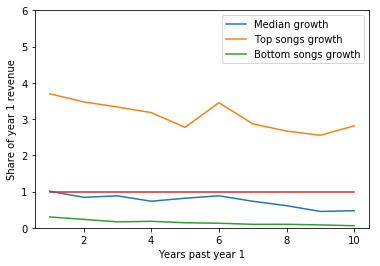

In [35]:
print('Song of age',age_y,'years - 90th, 50th, 10th percentiles share')
median_data = [p[3] for p in perfs[0]]
t90_data = [p[4] for p in perfs[0]]
t10_data = [p[5] for p in perfs[0]]
#plt.plot(mean_data[:20])
r = 10
plt.plot(range(1,r+1), median_data[:r],label='Median growth')
plt.plot(range(1,r+1), t90_data[:r],label='Top songs growth')
plt.plot(range(1,r+1), t10_data[:r],label='Bottom songs growth')
plt.plot(range(1,r+1), [1]*r)
plt.legend()
x_name = 'Years past year '+str(age_y)
y_name = 'Share of year '+str(age_y)+' revenue'
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.ylim([0,6])

In [36]:
#Input dollar age of interest
age_y = 7
#Input number of years to look for
r = 7
perfs = yearly_performance_shareofLTM(new_database, age_y, 10)
print('Expected share of LTM revenue for future years for a song of age', age_y,'years')

Expected share of LTM revenue for future years for a song of age 7 years


Song of age 7 years - 90th, 50th, 10th percentiles share


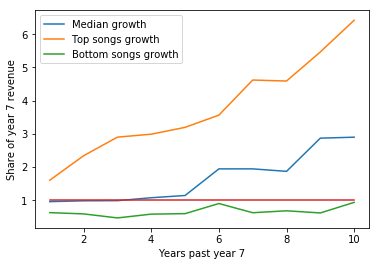

In [37]:
print('Song of age',age_y,'years - 90th, 50th, 10th percentiles share')
median_data = [p[3] for p in perfs[0]]
t90_data = [p[4] for p in perfs[0]]
t10_data = [p[5] for p in perfs[0]]
#plt.plot(mean_data[:20])
r = 10
plt.plot(range(1,r+1), median_data[:r],label='Median growth')
plt.plot(range(1,r+1), t90_data[:r],label='Top songs growth')
plt.plot(range(1,r+1), t10_data[:r],label='Bottom songs growth')
plt.plot(range(1,r+1), [1]*r)
plt.legend()
x_name = 'Years past year '+str(age_y)
y_name = 'Share of year '+str(age_y)+' revenue'
plt.xlabel(x_name)
plt.ylabel(y_name)

7Y contract Multiplier calculation - 90th, 50th, 10th percentiles


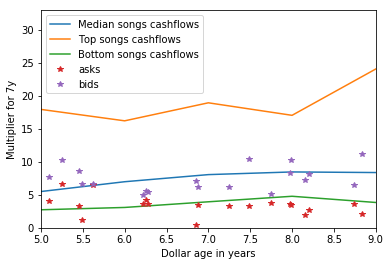

In [38]:
#Produce a graph for a multiplier for a 10y contract
multis_median = []
multis_top10 = []
multis_top90 = []
mutltis_print = []
for target_da in range(5, 10):
    median_app = calc_multiplier_perc(new_database, target_da, 0.1, 7, 50)
    t10_app = calc_multiplier_perc(new_database, target_da, 0.1, 7, 10)
    t90_app = calc_multiplier_perc(new_database, target_da, 0.1, 7, 90)
    multis_median.append(median_app)
    multis_top10.append(t10_app)
    multis_top90.append(t90_app)

print('7Y contract Multiplier calculation - 90th, 50th, 10th percentiles')
plt.plot(range(5,10), multis_median,label='Median songs cashflows')
plt.plot(range(5,10), multis_top90,label='Top songs cashflows')
plt.plot(range(5,10), multis_top10,label='Bottom songs cashflows')

plt.plot(asks7y['dollar_age'],asks7y['buyNowPriceMultiple']/asks7y['buyNowPrice']*asks7y['latest offer'], '*',label='asks')
plt.plot(asks7y['dollar_age'],asks7y['buyNowPriceMultiple'], '*', label='bids')
plt.ylim([0,33])
plt.xlim([5,9])
plt.xlabel('Dollar age in years')
plt.ylabel('Multiplier for 7y')
plt.legend(loc='upper left')
plt.show()

In [39]:
#Produce a graph for a multiplier for a 10y contract as it ages 
multis_median = []
multis_top10 = []
multis_top90 = []
initial_age_years = 7
#relevant_obs_x = [obs[0] for obs in observations if obs[1]==initial_age_years]
#relevant_obs_y = [obs[2] for obs in observations if obs[1]==initial_age_years]

Multiplier for the remainder of the 10Y contract for a song of initial age 7 - 90th, 50th, 10th percentiles


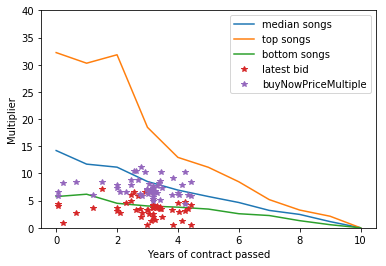

In [40]:
plt.figure()
multis_median=[]
multis_top10=[]
multis_top90=[]

for target_da in range(11):
    median_data = calc_multiplier_perc(new_database, initial_age_years+target_da, 0.098, 10-target_da, 50)
    t90_data = calc_multiplier_perc(new_database, initial_age_years+target_da, 0.098, 10-target_da, 90)
    t10_data = calc_multiplier_perc(new_database, initial_age_years+target_da, 0.098, 10-target_da, 10)
    multis_median.append(median_data)
    multis_top10.append(t10_data)
    multis_top90.append(t90_data)

print('Multiplier for the remainder of the 10Y contract for a song of initial age', initial_age_years, '- 90th, 50th, 10th percentiles')
plt.plot(multis_median,label='median songs')
plt.plot(multis_top90,label='top songs')
plt.plot(multis_top10,label='bottom songs')
#plt.plot(bids['Time past'],bids['highest open offer multiplier'], '*')
#plt.plot(asks['Time past'],asks['list price multiplier'], '*')
plt.plot(quotes['Time past'],quotes['buyNowPriceMultiple']/quotes['buyNowPrice']*quotes['latest offer'], '*',label='latest bid')
plt.plot(quotes['Time past'],quotes['buyNowPriceMultiple'], '*')
plt.ylim([0,40])
plt.legend()
#plt.plot(relevant_obs_x, relevant_obs_y, 'x')
plt.xlabel('Years of contract passed')
plt.ylabel('Multiplier')
